In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Tree 생성경로 지정
import os
# PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
# os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"

In [3]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "Malgun Gothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [4]:
import matplotlib.pyplot as plt
# 글꼴 적용
plt.rc('font', family = 'NanumBarunGothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

In [5]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/빅데이터_이차전지/bat_process.csv")
df_raw.head()

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,dt_start_old,sa4_box_row,sa4_box_col,sa4_box_dan
0,LOT-100,TRAY-1023,01SEP2022:10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,6.8,4718.0,37583.0,94.0,565.0,164.0,01SEP2020:10:01:25,07열,27연,03단
1,LOT-100,TRAY-1023,01SEP2022:10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,6.8,4718.0,37574.0,94.0,565.0,73.0,01SEP2020:10:01:25,07열,27연,03단
2,LOT-100,TRAY-1023,01SEP2022:10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,6.9,4700.0,37579.0,91.0,585.0,-57.0,01SEP2020:10:01:25,07열,27연,03단
3,LOT-100,TRAY-1023,01SEP2022:10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,6.9,4688.0,37583.0,93.0,606.0,99.0,01SEP2020:10:01:25,07열,27연,03단
4,LOT-100,TRAY-1023,01SEP2022:10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,6.8,4696.0,37570.0,91.0,605.0,36.0,01SEP2020:10:01:25,07열,27연,03단


In [6]:
columns_to_keep = ['dc2_temp_avg','judge']
df_raw = df_raw[columns_to_keep]

# 결과 확인
print(df_raw)

       dc2_temp_avg judge
0               266    양품
1               266    양품
2               266    양품
3               266    양품
4               266    양품
...             ...   ...
44073           256    양품
44074           256    양품
44075           256    양품
44076           256    양품
44077           256    불량

[44078 rows x 2 columns]


In [7]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)
# 결측치가 있는 행을 제거
df_cleaned = df_raw.dropna()

# 결과 확인
print(df_cleaned)
# 결측치 처리 확인
df_cleaned.isnull().sum()

       dc2_temp_avg judge
0               266    양품
1               266    양품
2               266    양품
3               266    양품
4               266    양품
...             ...   ...
44073           256    양품
44074           256    양품
44075           256    양품
44076           256    양품
44077           256    불량

[44078 rows x 2 columns]


dc2_temp_avg    0
judge           0
dtype: int64

#### 범주형 설명변수 더미 변환

In [8]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_cleaned)
df_raw_dummy.head()

,dc2_temp_avg,judge_불량,judge_양품
0,266,0,1
1,266,0,1
2,266,0,1
3,266,0,1
4,266,0,1


In [9]:
# 'judge_양품' 열을 지우고 나머지 열을 유지
df_raw = df_raw_dummy.drop(columns=['judge_양품'])

df_raw.head()

,dc2_temp_avg,judge_불량
0,266,0
1,266,0
2,266,0
3,266,0
4,266,0


#### 데이터 분리/ 분할

In [10]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw.drop("judge_불량", axis = 1, inplace = False)
df_raw_y = df_raw["judge_불량"] 

# # 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
# df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
#     df_raw_x, df_raw_y, test_size = 0.0, random_state = 1234) 

# print("분할 전 설명변수 데이터 :", df_raw_x.shape)
# print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

In [11]:
display(df_raw.head(10))
display(df_raw_x.head(10))

,dc2_temp_avg,judge_불량
0,266,0
1,266,0
2,266,0
3,266,0
4,266,0
5,266,0
6,266,0
7,266,0
8,266,0
9,266,0


,dc2_temp_avg
0,266
1,266
2,266
3,266
4,266
5,266
6,266
7,266
8,266
9,266


In [32]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['dc2_temp_avg'], dtype='object')

변수 :  Index(['dc2_temp_avg'], dtype='object')


### @불균형 자료 사전 처리:over-, under-sampling-SMOTE

class imblearn.over_sampling.SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)

In [40]:
# !pip install imblearn

In [41]:
# 샘플링 : Over-sampling 등
# from imblearn.over_sampling import SMOTE

In [42]:
# # 목표변수 빈도 확인
# print(df_raw.value_counts(["judge_불량"]),"\n")
# print("judge_불량=1 비율  ", df_raw.value_counts(df_raw["judge_불량"]==1)/len(df_raw))

judge_불량
0           42702
1            1376
dtype: int64 

judge_불량=1 비율   judge_불량
False    0.968783
True     0.031217
dtype: float64


In [43]:
# # Over-sampling 설정
# sm = SMOTE(sampling_strategy=0.2, random_state=1234)

# # train데이터를 이용한 Over-sampling
# x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# # 결과 확인
# print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
# print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
# print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

# print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
# print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    29917
1      937
Name: judge_불량, dtype: int64 

Over-Sampling 후 Train X: (35900, 1)
Over-Sampling 후 Train Y: (35900,) 

Over-Sampling 후 '1':5983
Over-Sampling 후 '0':29917


## 모델 생성

### Default option Moel

In [12]:
tree_uncust = DecisionTreeClassifier(random_state=1234 )
tree_uncust.fit(df_raw_x, df_raw_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_raw_x, df_raw_y)))
# # test 데이터 정확도
# print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 0.969


In [34]:
# 실행옵션 확인
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


### @max_depth(최대 깊이) 변화에 따른 모델 성능

In [35]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경.
para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [36]:
para_depth

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [37]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.97,0.967
1,4,0.97,0.967
2,5,0.97,0.967
3,6,0.97,0.967
4,7,0.97,0.967
5,8,0.97,0.967
6,9,0.97,0.967
7,10,0.97,0.967
8,11,0.97,0.967


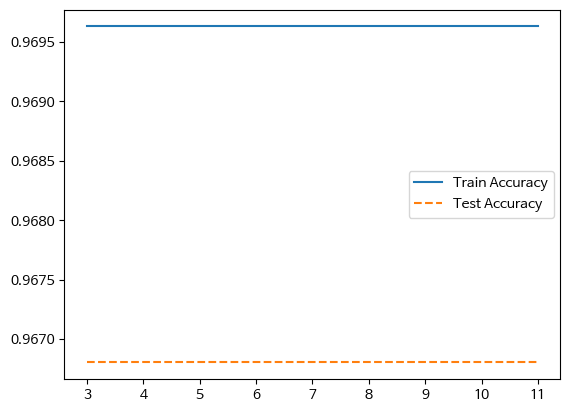

In [38]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### 깊이(max_depth)에 따른 결과 확인
깊이 = 4

In [14]:
# 변수명 저장
v_feature_name = df_raw_x.columns

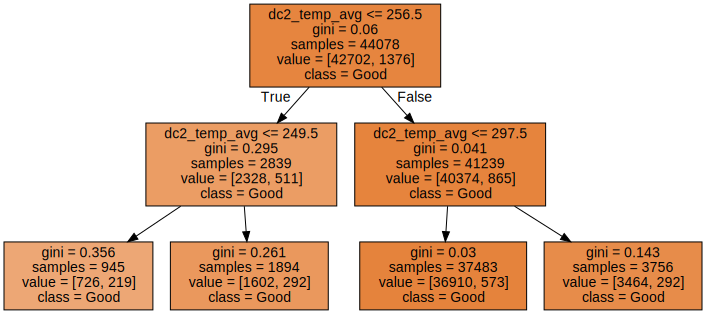

In [15]:
tree_low = DecisionTreeClassifier(max_depth = 2, random_state=1234)
tree_low.fit(df_raw_x, df_raw_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수 레이블 지정(class_names):0-Good,1-Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good", "Bad"], 
                feature_names = v_feature_name, impurity = True, filled = True)

# 트리 결과 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

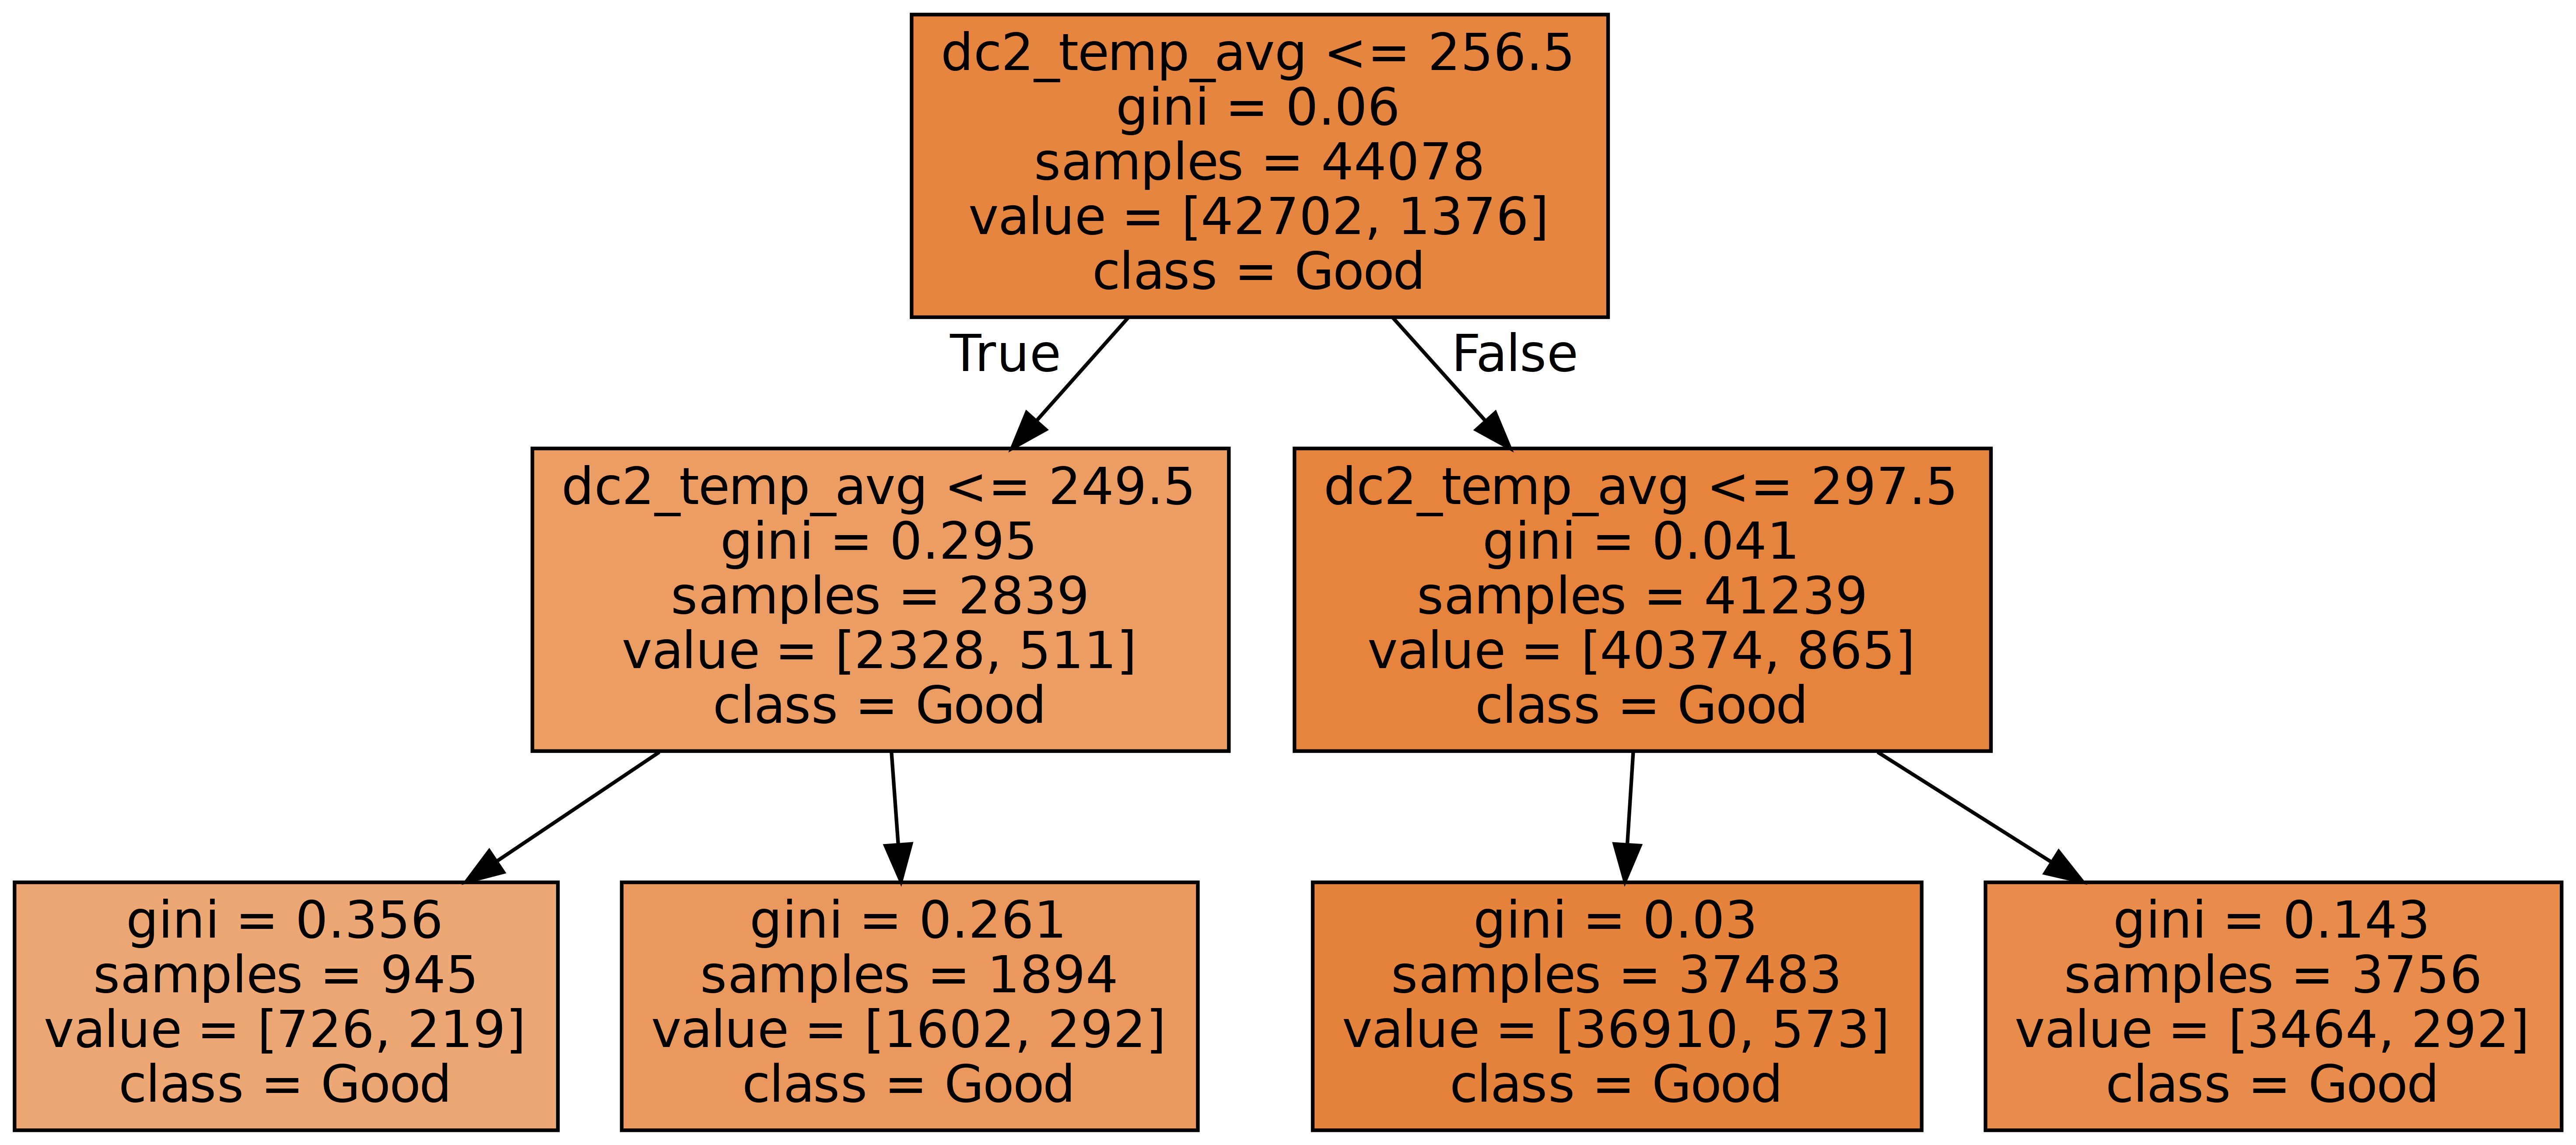

In [16]:
# 생성된 .dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree_low.dot', '-o', 'tree_low.png', '-Gdpi=600'])
# jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
Image(filename = 'tree_low.png')

### @min_samples_split(분리노드의 최소 샘플 수) 조정에 따른 정확도 변화